# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
from extract_dataframe import read_json       
from extract_dataframe import TweetDfExtractor    
from clean_tweets_dataframe import Clean_Tweets

# Data Preprocessing

* Data Extraction

In [4]:
_, tweet_list = read_json("data/Economic_Twitter_Data.json")
tweet = TweetDfExtractor(tweet_list)
Data = tweet.get_tweet_df(True)

File Successfully Saved!


* Data Cleaning

In [5]:
tweet_df = pd.read_csv('processed_tweet_data.csv')
clean = Clean_Tweets(tweet_df)
tweet_df = clean.drop_unwanted_column(tweet_df)
tweet_df = clean.drop_duplicate(tweet_df)
tweet_df = clean.convert_to_datetime(tweet_df)
tweet_df = clean.convert_to_numbers(tweet_df)
clean_tweet_df = clean.remove_non_english_tweets(tweet_df)
clean_tweet_df["source"] = clean_tweet_df["source"].apply(clean.get_source_name)

Data cleaning in Action...!!!
Unwanted_columns removed
Duplicate rows removed
created_at string converted to datetime object
String converted to numeric object
Non-English languages removed


C:\Users\Selu\AppData\Local\Temp/ipykernel_8916/1006256053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tweet_df["source"] = clean_tweet_df["source"].apply(clean.get_source_name)


In [6]:
print(tweet_df.shape)

(24514, 14)


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24514 entries, 0 to 24624
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          24514 non-null  datetime64[ns, UTC]
 1   source              24514 non-null  object             
 2   original_text       24511 non-null  object             
 3   polarity            24514 non-null  float64            
 4   subjectivity        24514 non-null  float64            
 5   lang                24514 non-null  object             
 6   favorite_count      24514 non-null  int64              
 7   retweet_count       24514 non-null  int64              
 8   original_author     24514 non-null  object             
 9   followers_count     24514 non-null  int64              
 10  possibly_sensitive  9925 non-null   object             
 11  hashtags            24514 non-null  object             
 12  place               16343 non-nu

In [8]:
tweet_df.head(n=3)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,possibly_sensitive,hashtags,place,friends_count
0,2022-04-22 22:20:18+00:00,"<a href=""http://twitter.com/download/android"" ...","Annalena Baerbock sagt, es bricht ihr das Her...",0.0,0.0,de,113,355,McMc74078966,3,NaN,[],{'created_at': 'Fri Apr 22 14:38:54 +0000 2022...,12
1,2022-04-22 22:19:16+00:00,"<a href=""http://twitter.com/download/android"" ...","Merkel schaffte es in 1 Jahr 1 Million ""Flüch...",0.0,0.0,de,113,505,McMc74078966,3,NaN,[],"{'id': 1487174445248692233, 'id_str': '1487174...",12
2,2022-04-22 22:17:28+00:00,"<a href=""http://twitter.com/download/android"" ...","@WRi007 Pharma in Lebensmitteln, Trinkwasser,...",0.0,0.0,de,113,4,McMc74078966,3,NaN,[],NaN,12


# Data Visulisation

* Sentiment Analysis

In [13]:
cleanTweet = tweet_df[['original_text','polarity']]

In [14]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

C:\Users\Selu\AppData\Local\Temp/ipykernel_8916/887397833.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
C:\Users\Selu\AppData\Local\Temp/ipykernel_8916/887397833.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


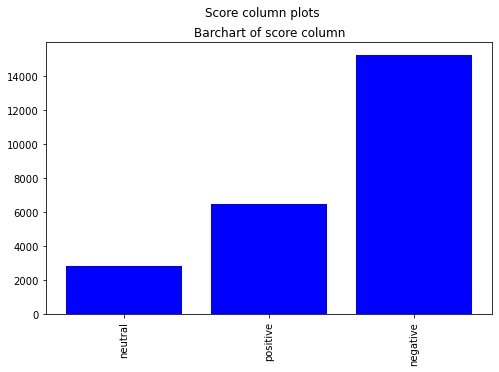

In [15]:
score = pd.Series([text_category(row_val) for row_val in cleanTweet['polarity']])
cleanTweet = pd.concat([cleanTweet, score.rename("score")], axis=1)

# Visualize The  score  column using barchart

# Create a figure for 2 subplots (1 row, 2 columns)
labels = ['neutral', 'positive', 'negative']
positive = len(cleanTweet[cleanTweet['score'] == "positive"])
negative = len(cleanTweet[cleanTweet['score'] == "negative"])
neutral = len(cleanTweet[cleanTweet['score'] == "neutral"])
fig, ax = plt.subplots(1, 1, figsize = (8,5))

# Create a bar plot of score column
ax.bar(x=labels, height=[negative, positive, neutral], color='blue')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels, rotation=90)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

In [16]:
cleanTweet = cleanTweet.drop(cleanTweet[cleanTweet.score == 'neutral'].index)
scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in cleanTweet['score']])
cleanTweet['scoremap'] = scoremap

# Data Exploration

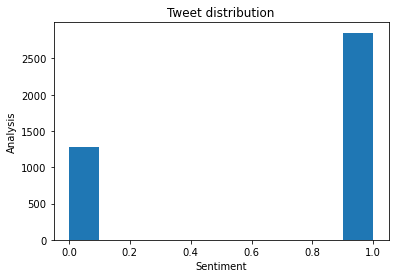

In [17]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(cleanTweet['scoremap'],bins = 10)

#Labels and Tit
plt.title('Tweet distribution')
plt.xlabel('Sentiment')
plt.ylabel('Analysis')
plt.show()